# Beer Consumption Prediction

<b>Imports</b>


In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

<b>Data Analysis</b>

In [2]:
df = pd.read_csv('/Users/juveriashaik/Downloads/Consumo_cerveja.csv',parse_dates = ['Data'])
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [3]:
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',','.')
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].str.replace(',','.')
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].str.replace(',','.')
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].str.replace(',','.')

df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [4]:
df['Month'] = df.Data.dt.month
df['day']=df.Data.dt.dayofweek
df.iloc[335:341]

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,day
335,2015-12-02,22.1,18.2,29.4,0,0.0,30.471,12.0,2.0
336,2015-12-03,22.44,20.2,26.1,0,0.0,28.405,12.0,3.0
337,2015-12-04,22.76,19,29.1,0,0.0,29.513,12.0,4.0
338,2015-12-05,24.8,19.5,30.6,0.1,1.0,32.451,12.0,5.0
339,2015-12-06,23.12,20.6,28,0.1,1.0,32.780,12.0,6.0
340,2015-12-07,20.04,18,23.9,47.8,0.0,23.375,12.0,0.0


In [5]:
df.set_index('Data',inplace = True)

In [6]:
df.shape

(941, 8)

In [7]:
print(df.isnull().sum())

Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
Month                          576
day                            576
dtype: int64


In [8]:
print(df.isnull().all(axis = 1).sum())

576


In [9]:
df.dropna(how = 'all', inplace = True)
df.shape

(365, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    object 
 1   Temperatura Minima (C)       365 non-null    object 
 2   Temperatura Maxima (C)       365 non-null    object 
 3   Precipitacao (mm)            365 non-null    object 
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    float64
 7   day                          365 non-null    float64
dtypes: float64(4), object(4)
memory usage: 25.7+ KB


<b>Changing the data-type of the features.</b>

In [11]:
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].astype(float)
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].astype(float)
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].astype(float)
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].astype(float)
df['Final de Semana'] = df['Final de Semana'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    int64  
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    float64
 7   day                          365 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 25.7 KB


<b>Checking for outliers -- </b>

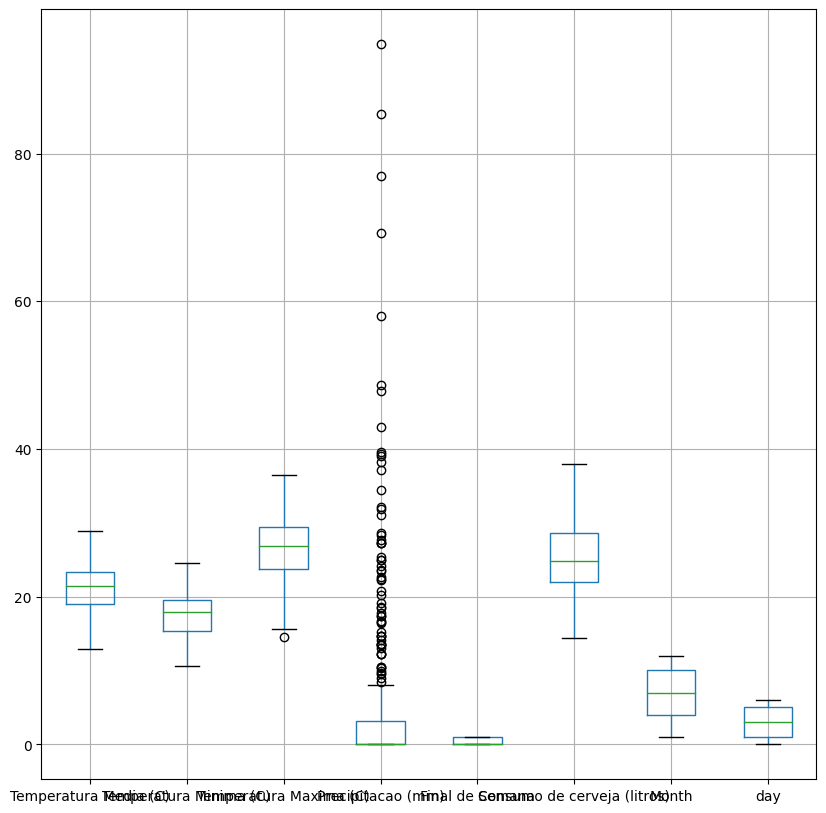

In [12]:
df.boxplot(figsize = (10,10))
plt.show()

Here the column preciptacao has a lot of outliers

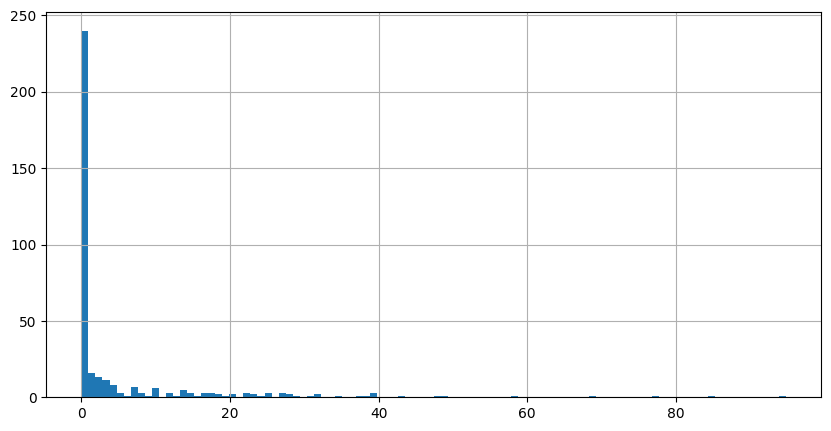

In [13]:
df['Precipitacao (mm)'].hist(bins =100, figsize = (10,5))
plt.show()

In [14]:
print(df['Precipitacao (mm)'][df['Precipitacao (mm)']==0].value_counts())

Precipitacao (mm)
0.0    218
Name: count, dtype: int64


In [15]:
df['Precipitacao (mm)'] = np.clip(df['Precipitacao (mm)'], 0, 40)

<Axes: >

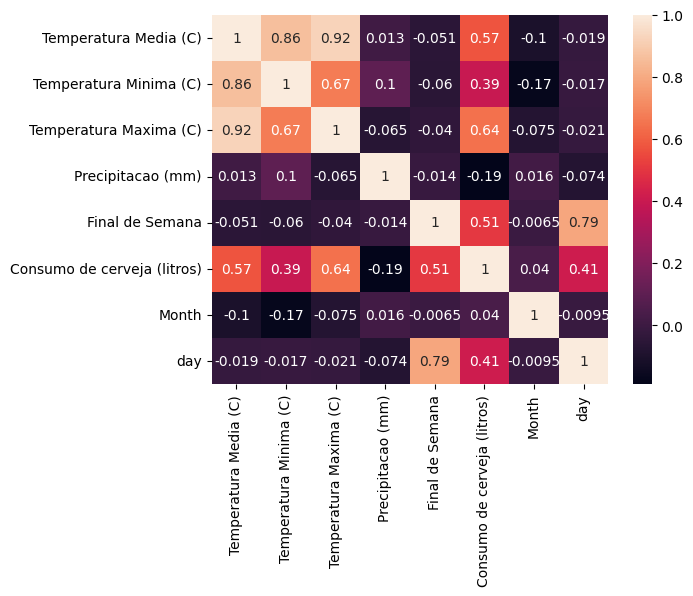

In [16]:
correlation = df.corr() 
sns.heatmap(correlation, annot = True)

<b>Training the model -</b>

In [17]:
x = df.drop(columns = ['Consumo de cerveja (litros)'], axis = 1)
y = df['Consumo de cerveja (litros)']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(292, 7)
(73, 7)
(292,)
(73,)


In [18]:
lr = LinearRegression()
lr.fit(x_train,y_train)

print("cofficiets:", lr.coef_)
print("intercepts:",lr.intercept_)

cofficiets: [-1.34341349e-01  1.22055186e-01  7.03305117e-01 -5.80658209e-02
  5.24988993e+00  1.36610989e-01  2.42604471e-03]
intercepts: 5.29911905706841


<b>Model Evaluation</b>

In [19]:
y_pred = lr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred, squared = False))

0.6692125883575046
2.0233917644808694
2.473741467659845
